<a href="https://colab.research.google.com/github/1C0DER/1C0DER.github.io/blob/main/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set
A data-set of 1473 married women with their demographic and socio-economic characteristics used in this study. The Source for the data-set is the UCI Machine Learning Repository at, http://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice <cite data-cite="Contraceptive_Method_Choice_UCI">(Dua, D. and Graff, C., 2013)</cite>.

This dataset was chosen because it will help in the expansion of the studies in reproductive health. Researchers can gain a better understanding of factors influencing family planning decisions, contributing to the development of effective family planning programs.

###Attribute Information
* `Wife's age`: numerical
* `Wife's education`: categorical (low, medium low, medium high, high)
* `Husband's education`: categorical (low, medium low, medium high, high)
* `Number of children ever born`: numerical
* `Wife's religion`: binary (Non-Islam, Islam)
* `Wife's now working?`: binary (Yes, No)
* `Husband's occupation`: categorical (Cat1, Cat2, Cat3, Cat4)
* `Standard-of-living index`: categorical (low, medium low, medium high, high)
* `Media exposure`: binary (Good, Bad)

# Objective
The objective of this study is to to predict the contraceptive methods of a woman based on her demographic and socio-economic characteristics. This will be done by preprocessing and exploring the data-set in order to build the model.

#Data Preprocessing

## Data Collecting

Importing the necessary libraries numpy arrays, pandas for data frames, seaborn for visualisation and matplitlib for visualisation.


In [510]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Inspected to check whether the features and descriptions are the same in the data-set.

In [511]:
#Dataset dimension
data=pd.read_csv('cmc.data',names=[ 'wife_age', 'wife_edu', 'husb_edu', 'children', 'wife_religion', 'wife-working', 'husb-occup',
                                       's-living_index', 'media_exp', 'contrac_mthd'])
data.head()

,wife_age,wife_edu,husb_edu,children,wife_religion,wife-working,husb-occup,s-living_index,media_exp,contrac_mthd
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


loading the dataset using pandas

In [512]:
#data size
print(f'The dataset contains {data.shape[0]} rows, and {data.shape[1]} columns')

The dataset contains 1473 rows, and 10 columns


Checking the names of the columns

In [513]:
data.columns

Index(['wife_age', 'wife_edu', 'husb_edu', 'children', 'wife_religion',
       'wife-working', 'husb-occup', 's-living_index', 'media_exp',
       'contrac_mthd'],
      dtype='object')

### Replacing numerical labels with descriptive ones

The original numerical values representing various data were replaced with descriptive labels for better interpretability, visualization, and communication of results since they can get quite confusing as they go on

In [514]:
#Replacing labels for wife's education with descriptive labels
data['wife_edu'].replace(1, "low", inplace=True)
data['wife_edu'].replace(2, "middle low", inplace=True)
data['wife_edu'].replace(3, "middle high", inplace=True)
data['wife_edu'].replace(4, "high", inplace=True)

#Replacing labels for husband's education descriptive labels
data['husb_edu'].replace(1, "low", inplace=True)
data['husb_edu'].replace(2, "middle low", inplace=True)
data['husb_edu'].replace(3, "middle high", inplace=True)
data['husb_edu'].replace(4, "high", inplace=True)

#Replacing labels for wife's religion with descriptive labels
data['wife_religion'].replace(1, "Islam", inplace=True)
data['wife_religion'].replace(0, "Other", inplace=True)

#Replacing labels for wifes current working status with descriptive labels
data['wife-working'].replace(1, "No", inplace=True)
data['wife-working'].replace(0, "Yes", inplace=True)

#Replacing labels for husband's occupation with descriptive labels
data['husb-occup'].replace(1, "Cat1", inplace=True)
data['husb-occup'].replace(2, "Cat2", inplace=True)
data['husb-occup'].replace(3, "Cat3", inplace=True)
data['husb-occup'].replace(4, "Cat4", inplace=True)

#Replacing labels for standards of living index with descriptive labels
data['s-living_index'].replace(1, "low", inplace=True)
data['s-living_index'].replace(2, "middle low", inplace=True)
data['s-living_index'].replace(3, "middle high", inplace=True)
data['s-living_index'].replace(4, "high", inplace=True)

#Replacing labels for madia exposure with descriptive labels
data['media_exp'].replace(1, "bad", inplace=True)
data['media_exp'].replace(0, "good", inplace=True)

#Replacing labels for contraceptive methods used with descriptive labels
data['contrac_mthd'].replace(1, "No-use", inplace=True)
data['contrac_mthd'].replace(2, "Long-term", inplace=True)
data['contrac_mthd'].replace(3, "Short-term", inplace=True)

Inspecting the variables to ensure that they have been changed

In [515]:
# and check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   wife_age        1473 non-null   int64 
 1   wife_edu        1473 non-null   object
 2   husb_edu        1473 non-null   object
 3   children        1473 non-null   int64 
 4   wife_religion   1473 non-null   object
 5   wife-working    1473 non-null   object
 6   husb-occup      1473 non-null   object
 7   s-living_index  1473 non-null   object
 8   media_exp       1473 non-null   object
 9   contrac_mthd    1473 non-null   object
dtypes: int64(2), object(8)
memory usage: 115.2+ KB


Viewing the unique values that
are present in each feature.

In [516]:
# for every column
for i in data.columns:
  # print the number of features it has
  print(i,len(data[i].unique()))

wife_age 34
wife_edu 4
husb_edu 4
children 15
wife_religion 2
wife-working 2
husb-occup 4
s-living_index 4
media_exp 2
contrac_mthd 3


Printing the unique values for columns with less than 10 unique values

In [517]:
for column in data.columns:
    unique_values = data[column].unique()
    if len(unique_values) < 10:
        print(f'{column} has {len(unique_values)} unique values. These are: {unique_values}')

wife_edu has 4 unique values. These are: ['middle low' 'low' 'middle high' 'high']
husb_edu has 4 unique values. These are: ['middle high' 'middle low' 'high' 'low']
wife_religion has 2 unique values. These are: ['Islam' 'Other']
wife-working has 2 unique values. These are: ['No' 'Yes']
husb-occup has 4 unique values. These are: ['Cat2' 'Cat3' 'Cat1' 'Cat4']
s-living_index has 4 unique values. These are: ['middle high' 'high' 'middle low' 'low']
media_exp has 2 unique values. These are: ['good' 'bad']
contrac_mthd has 3 unique values. These are: ['No-use' 'Long-term' 'Short-term']


A summary of statistical information about the numerical columns in the dataset

In [518]:
#statistical information
data.describe()

,wife_age,children
count,1473.000000,1473.000000
mean,32.538357,3.261371
std,8.227245,2.358549
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,4.000000
max,49.000000,16.000000


The data.quantile code below is used to calculate quantiles (percentiles) of the numeric columns in the DataFrame data. The specified quantiles are 10%, 25%, 50% (median), and 75%.

In [519]:
data.quantile([.1, .25, .5, .75], axis = 0)

<ipython-input-519-80f46ab4a022>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.quantile([.1, .25, .5, .75], axis = 0)


,wife_age,children
0.10,22.0,1.0
0.25,26.0,1.0
0.50,32.0,3.0
0.75,39.0,4.0


 Print ing information about the unique values and their occurrences for each column the dataset. This will help us understand the distribution of the various categories

In [520]:
for col in ['wife_edu', 'husb_edu', 'wife_religion', 'wife-working', 'husb-occup', 's-living_index', 'media_exp', 'contrac_mthd']:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()

    print(f"{col} has {len(unique_values)} unique values. These are: {unique_values}")

    for value, count in value_counts.items():
        print(f" - {value}: {count} occurrences")

    print("\n")


wife_edu has 4 unique values. These are: ['middle low' 'low' 'middle high' 'high']
 - high: 577 occurrences
 - middle high: 410 occurrences
 - middle low: 334 occurrences
 - low: 152 occurrences


husb_edu has 4 unique values. These are: ['middle high' 'middle low' 'high' 'low']
 - high: 899 occurrences
 - middle high: 352 occurrences
 - middle low: 178 occurrences
 - low: 44 occurrences


wife_religion has 2 unique values. These are: ['Islam' 'Other']
 - Islam: 1253 occurrences
 - Other: 220 occurrences


wife-working has 2 unique values. These are: ['No' 'Yes']
 - No: 1104 occurrences
 - Yes: 369 occurrences


husb-occup has 4 unique values. These are: ['Cat2' 'Cat3' 'Cat1' 'Cat4']
 - Cat3: 585 occurrences
 - Cat1: 436 occurrences
 - Cat2: 425 occurrences
 - Cat4: 27 occurrences


s-living_index has 4 unique values. These are: ['middle high' 'high' 'middle low' 'low']
 - high: 684 occurrences
 - middle high: 431 occurrences
 - middle low: 229 occurrences
 - low: 129 occurrences


med

This shows the wife_age of the data-set spanning from around 16 years to almost 50 years. The histogram clearly shows the right skewness of the children count in the data-set. Also, the highest proportion of records has wife_age between ~25 to ~37 years.

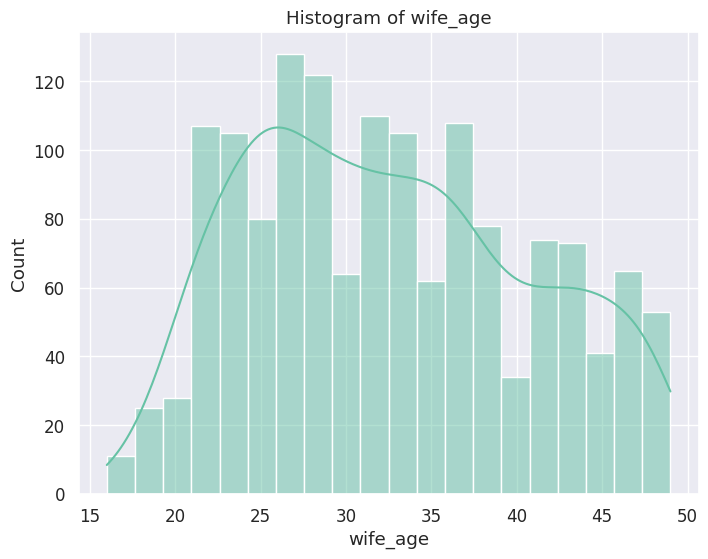

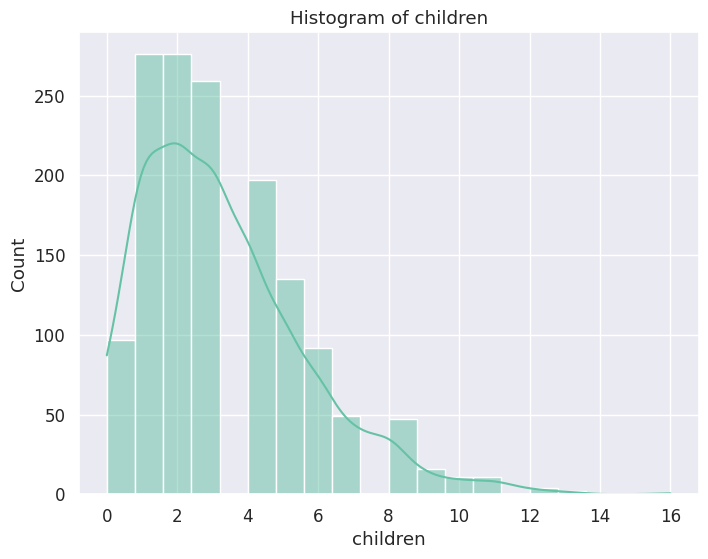

In [521]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

# First, we make a copy of the dataset to decode the variables (for visualization purposes)
dataC = data.copy()

def HistogramPlot(x, title=None, xlabel=None, bins=None):
    plt.figure(figsize=(8, 6))
    sns.histplot(x, bins=bins, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

# Create histograms for 'wife_age' and 'children'
for col in ['wife_age', 'children']:
    HistogramPlot(data[col], title=f'Histogram of {col}', xlabel=col, bins=20)


The middle 50% of the wife_age resides between 26 age to 39 age as can be seen from the box plot.

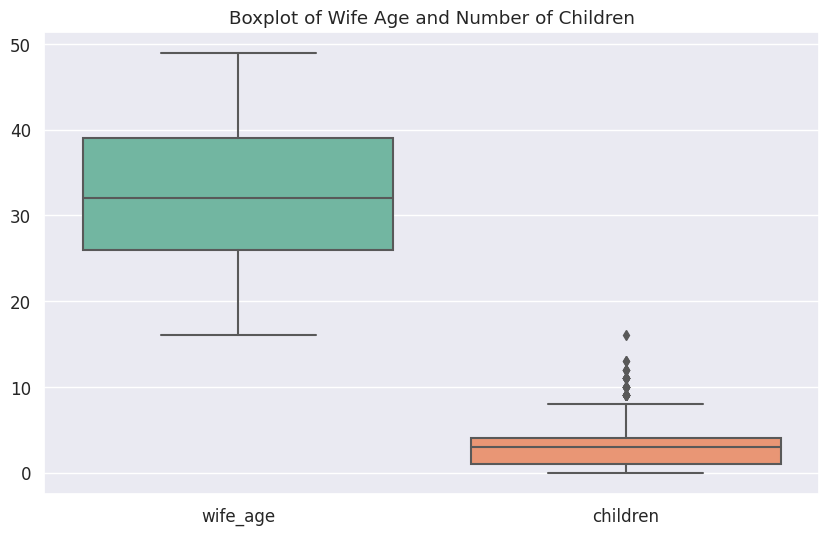

In [522]:
#boxplot visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataC[['wife_age', 'children']])
plt.title('Boxplot of Wife Age and Number of Children')
plt.show()

To gain a sense of our data this is a graph showing the contraceptive method used against the number of womn. The most popular form was ​non-usage with 629 instances, followed by 511 women using ​short-term​ options while 333 women used ​long-term​ contraceptives.

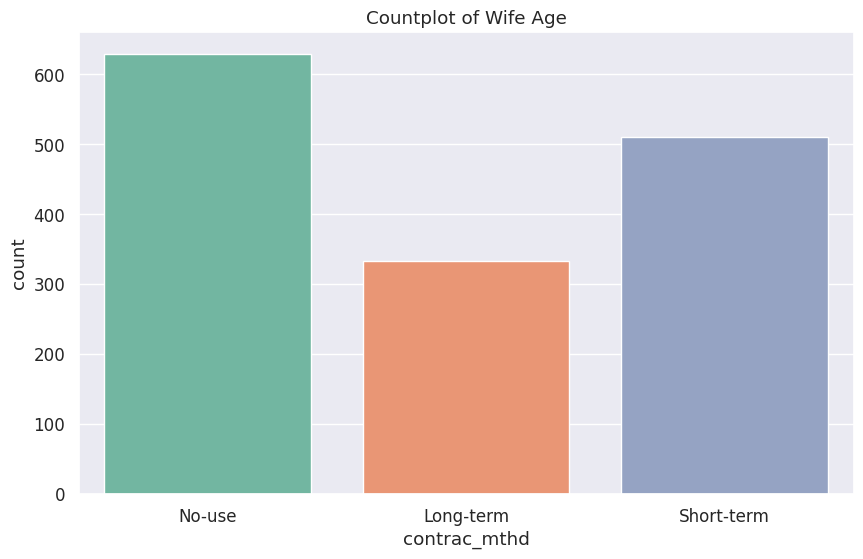

In [523]:
plt.figure(figsize=(10, 6))
sns.countplot(x='contrac_mthd', data=dataC)
plt.title('Countplot of Wife Age')
plt.show()

Using Pie charts to categorize each attribute

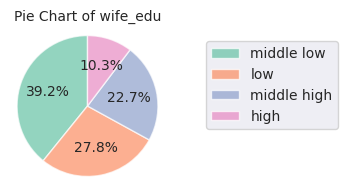

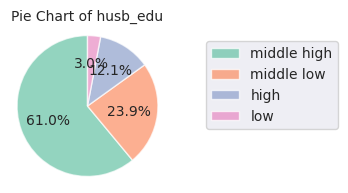

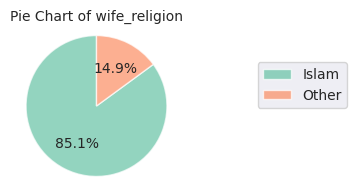

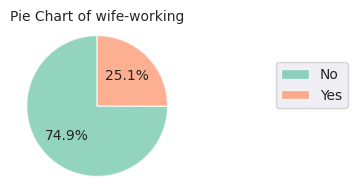

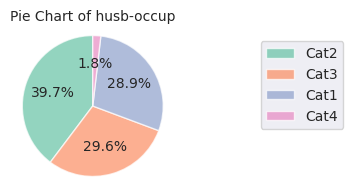

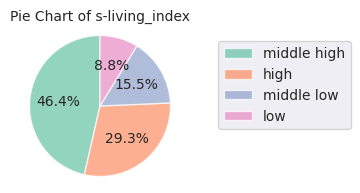

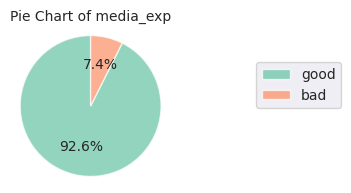

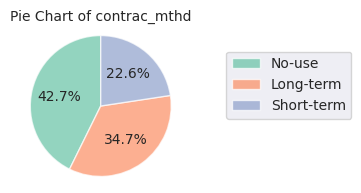

In [524]:
for col in data.columns:
    if (data[col].dtype.name == 'object'):
        # Create a pie chart for each categorical column
        data[col].value_counts().plot(
            kind='pie', fontsize=10, autopct='%.1f%%',
            pctdistance=0.6, startangle=90, labels=None,
            wedgeprops={'alpha': 0.7, 'edgecolor': 'white'},
            figsize=(2, 2)
        )

        plt.ylabel('')
        plt.axis('equal')
        plt.legend(labels=data[col].unique(), bbox_to_anchor=(1.8, 0.6), loc="center right",
                   fontsize=10, bbox_transform=plt.gcf().transFigure)
        plt.title('Pie Chart of ' + col, size=10)

        # Display each pie chart
        plt.show()

Using Barplots to categorize each attribute displaying the frequency of contraceptive methods used per group defined by different categorical features

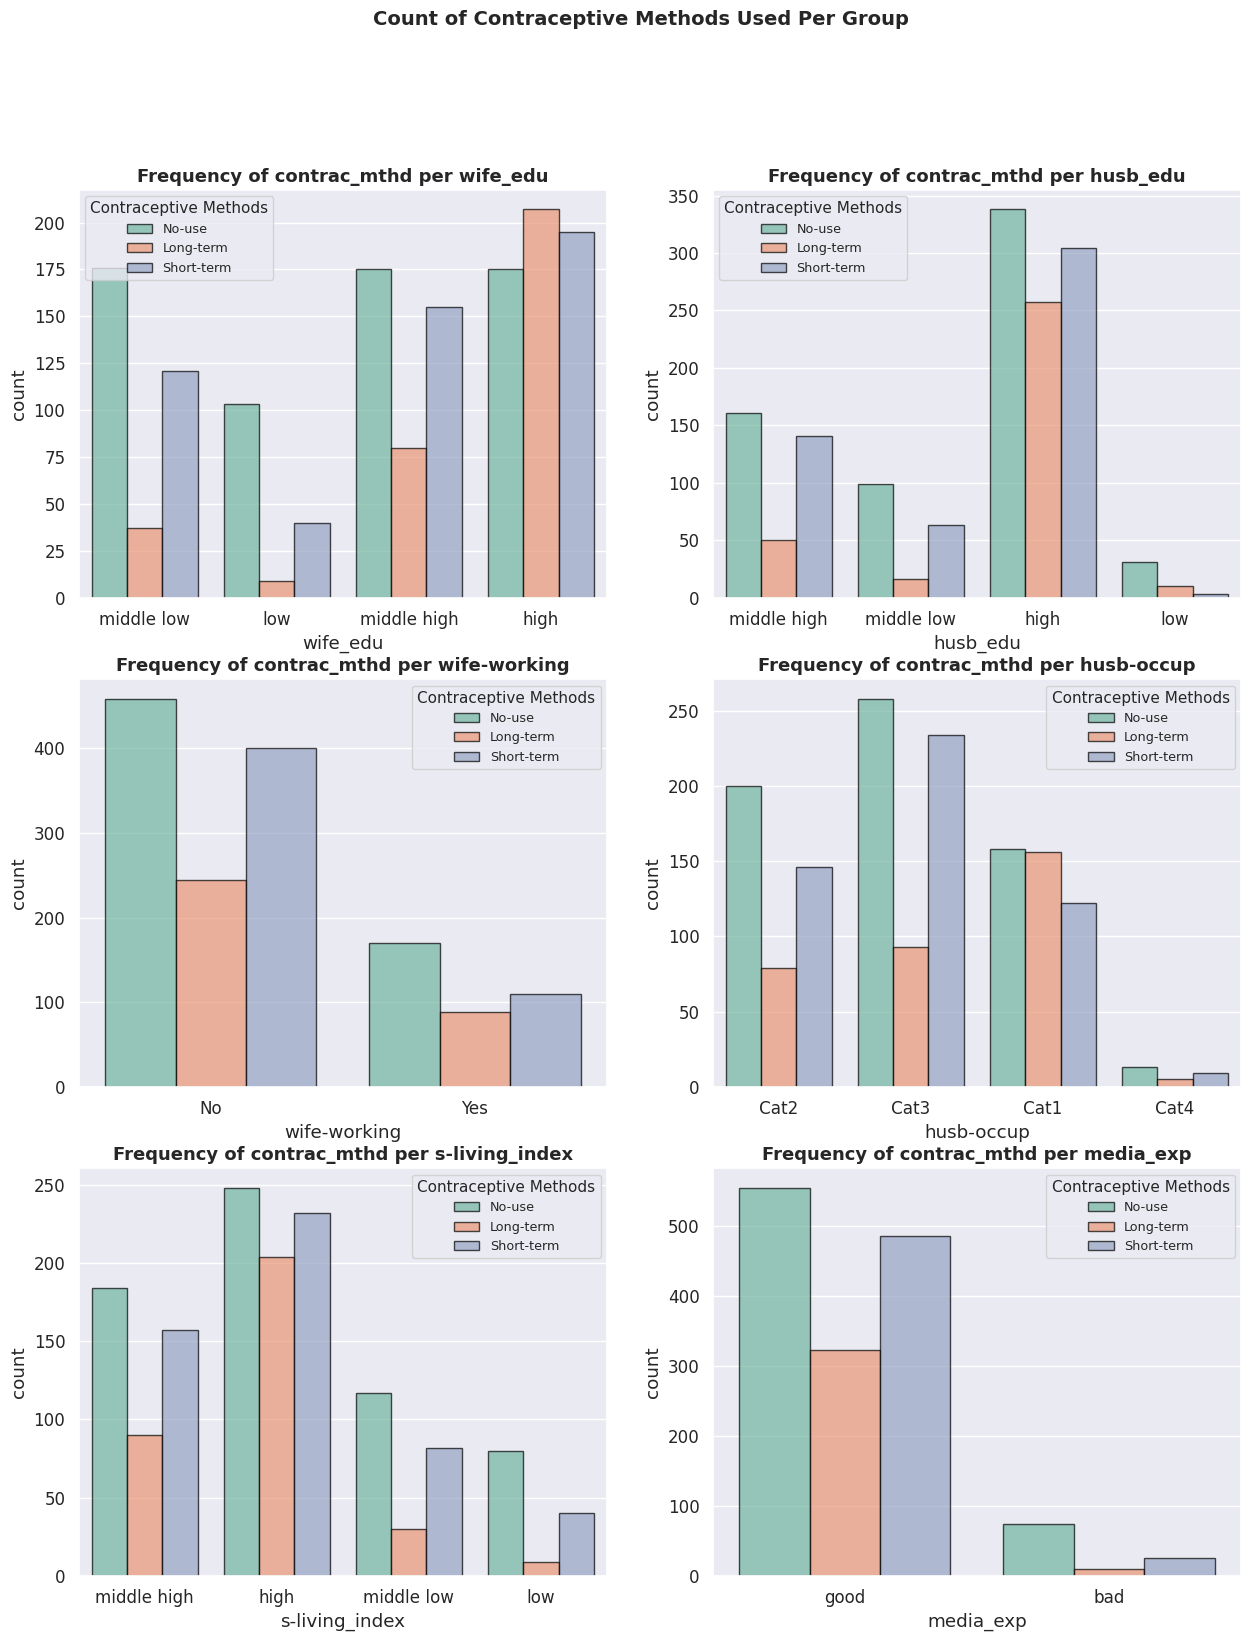

In [525]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

fig, ax = plt.subplots(3, 2, figsize=(15,18))

for col, ax in zip(['wife_edu', 'husb_edu', 'wife-working','husb-occup','s-living_index',
                    'media_exp'], ax.flatten()):
    sns.countplot(x=col, hue='contrac_mthd', data=data, ax=ax,alpha=0.7,edgecolor="black")
    fig.suptitle("Count of Contraceptive Methods Used Per Group", weight='bold', size=14)
    ax.set_title("Frequency of contrac_mthd per " + col,
                 weight='bold', size=13)
    ax.legend(prop = {'size':'x-small'}).set_title('Contraceptive Methods',
                                                   prop = {'size':'small'})

Using Barplots to categorize each attribute.  It's noticeable that women with lower levels of education tend to use temporary solutions when they are younger and stop using them as they get older. The majority of category features indicate that families with three to six children utilize both short- and long-term contraceptive methods.

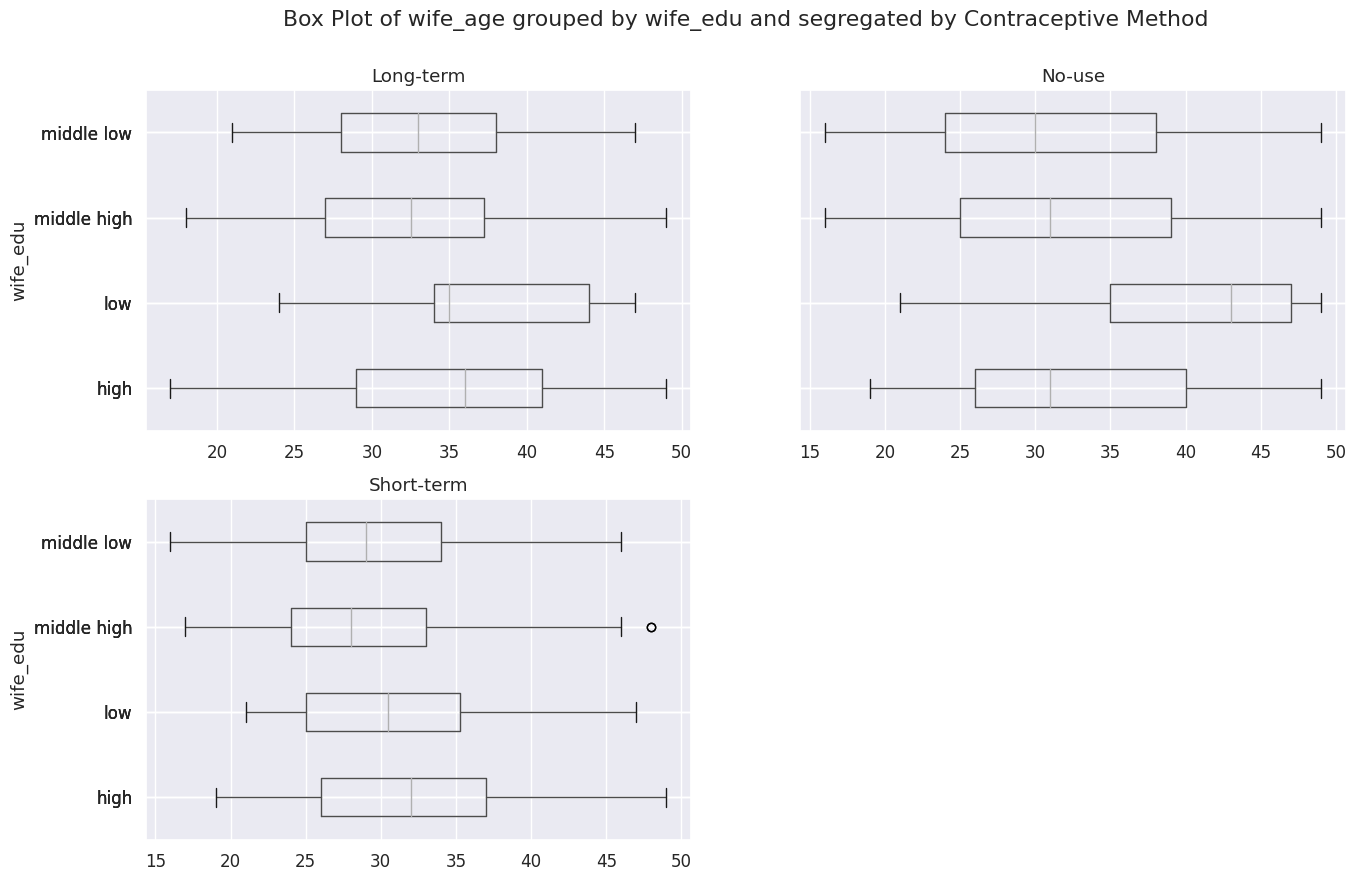

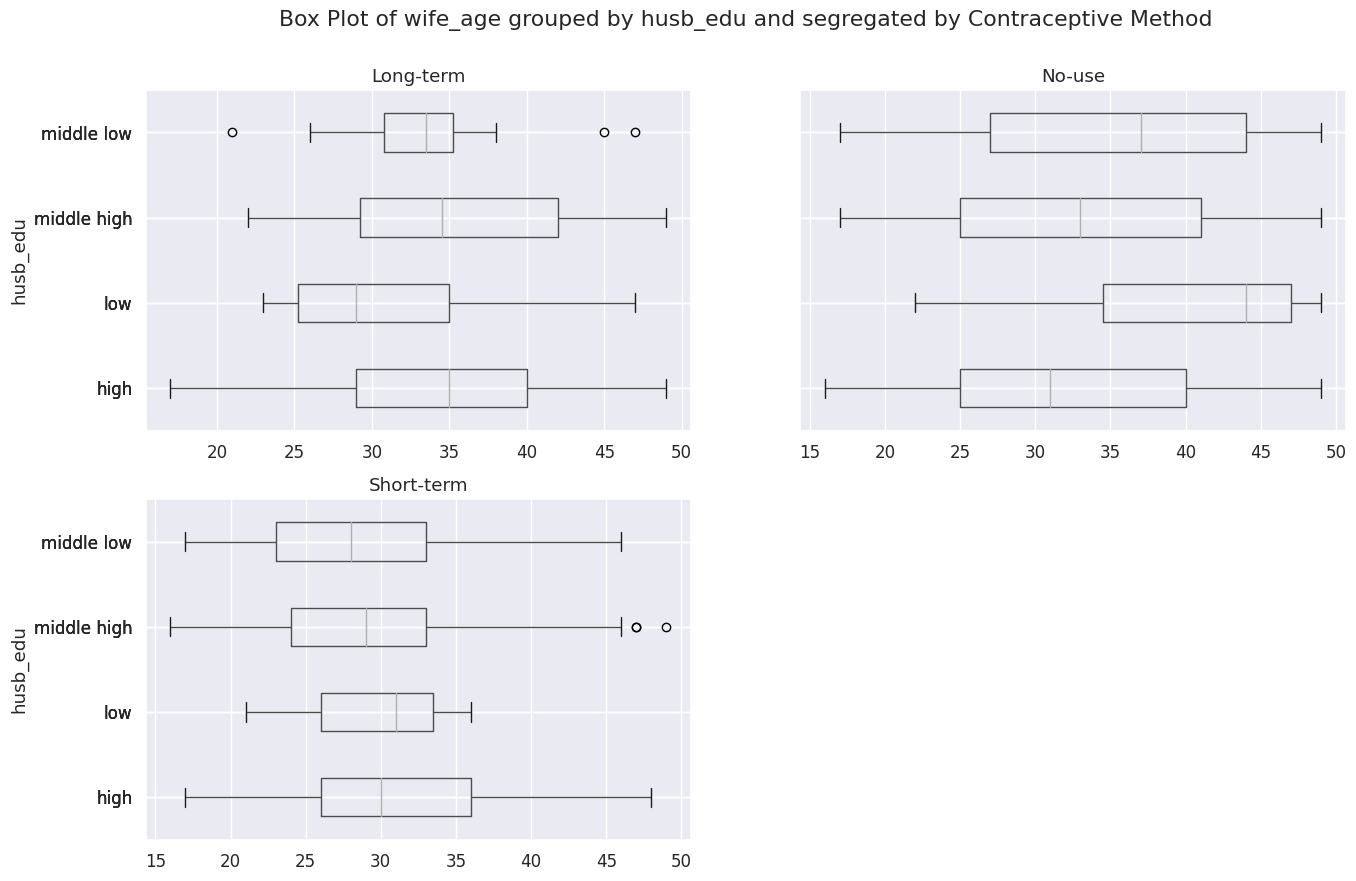

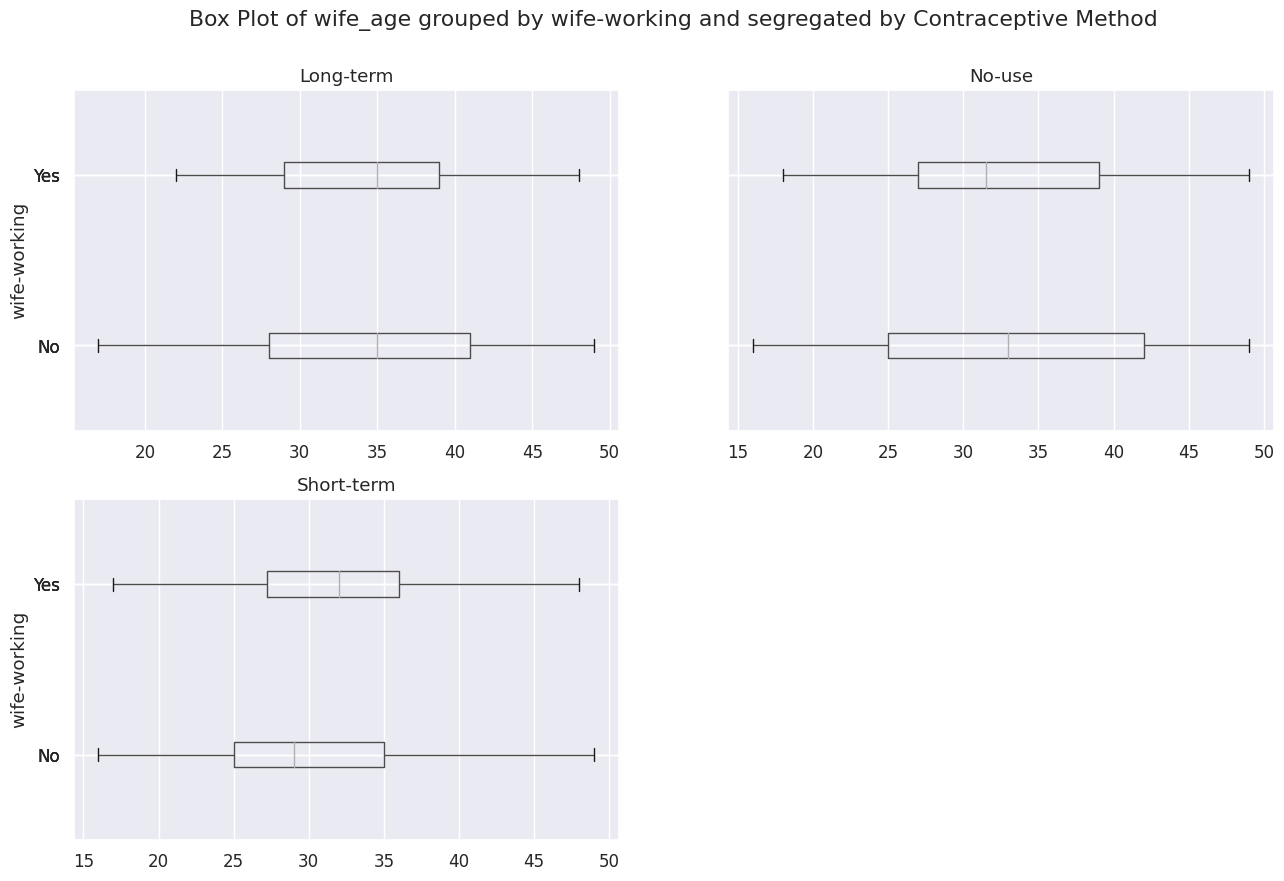

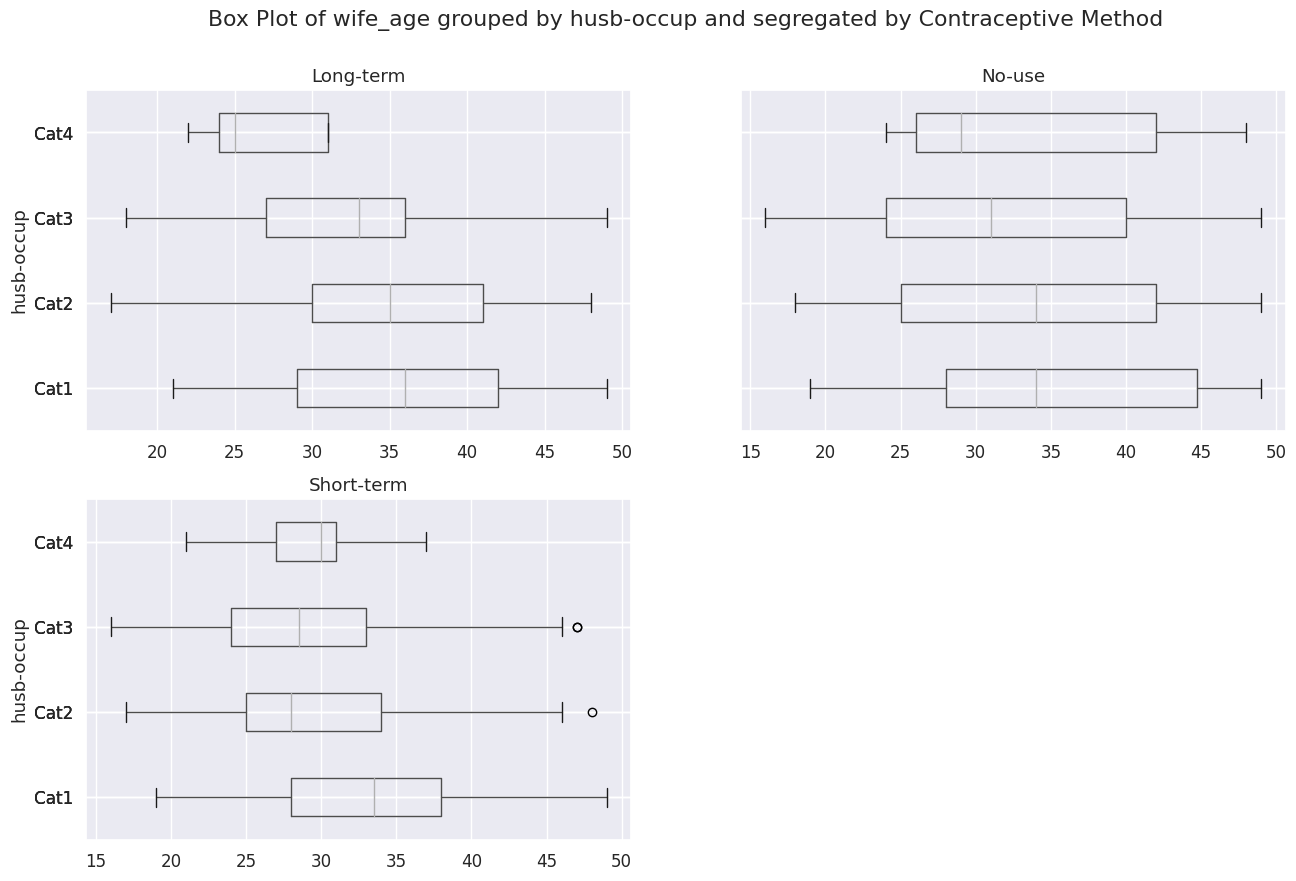

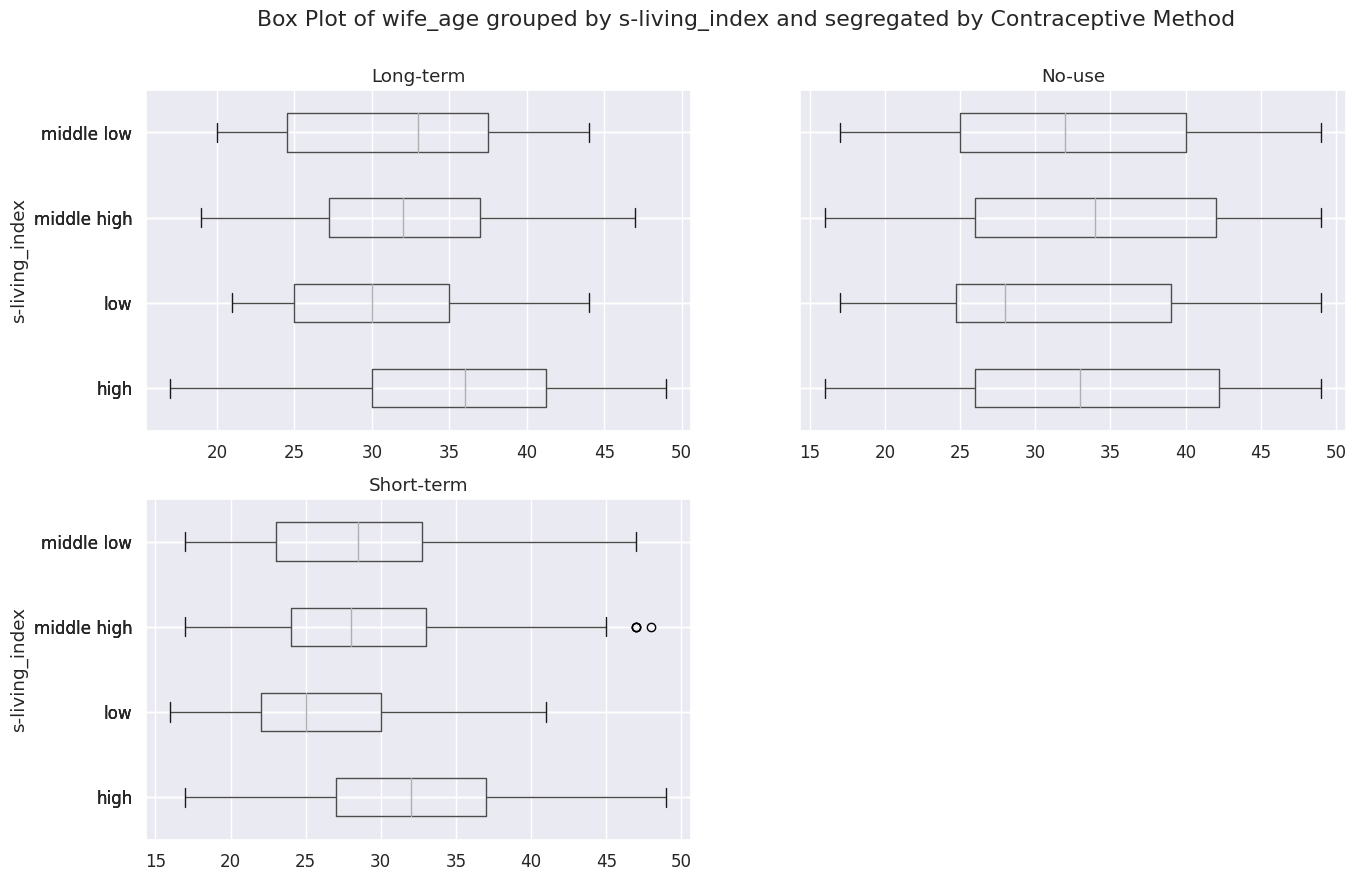

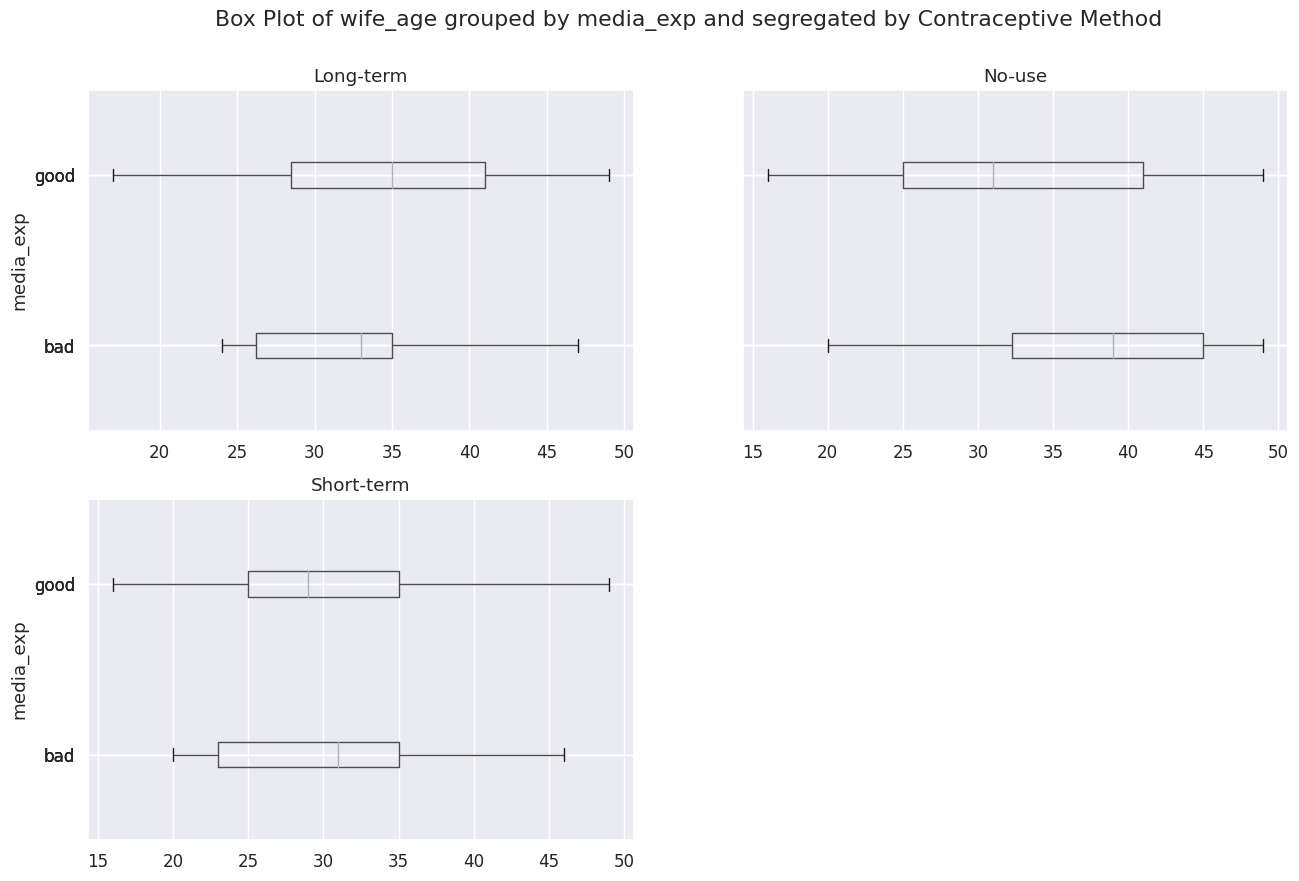

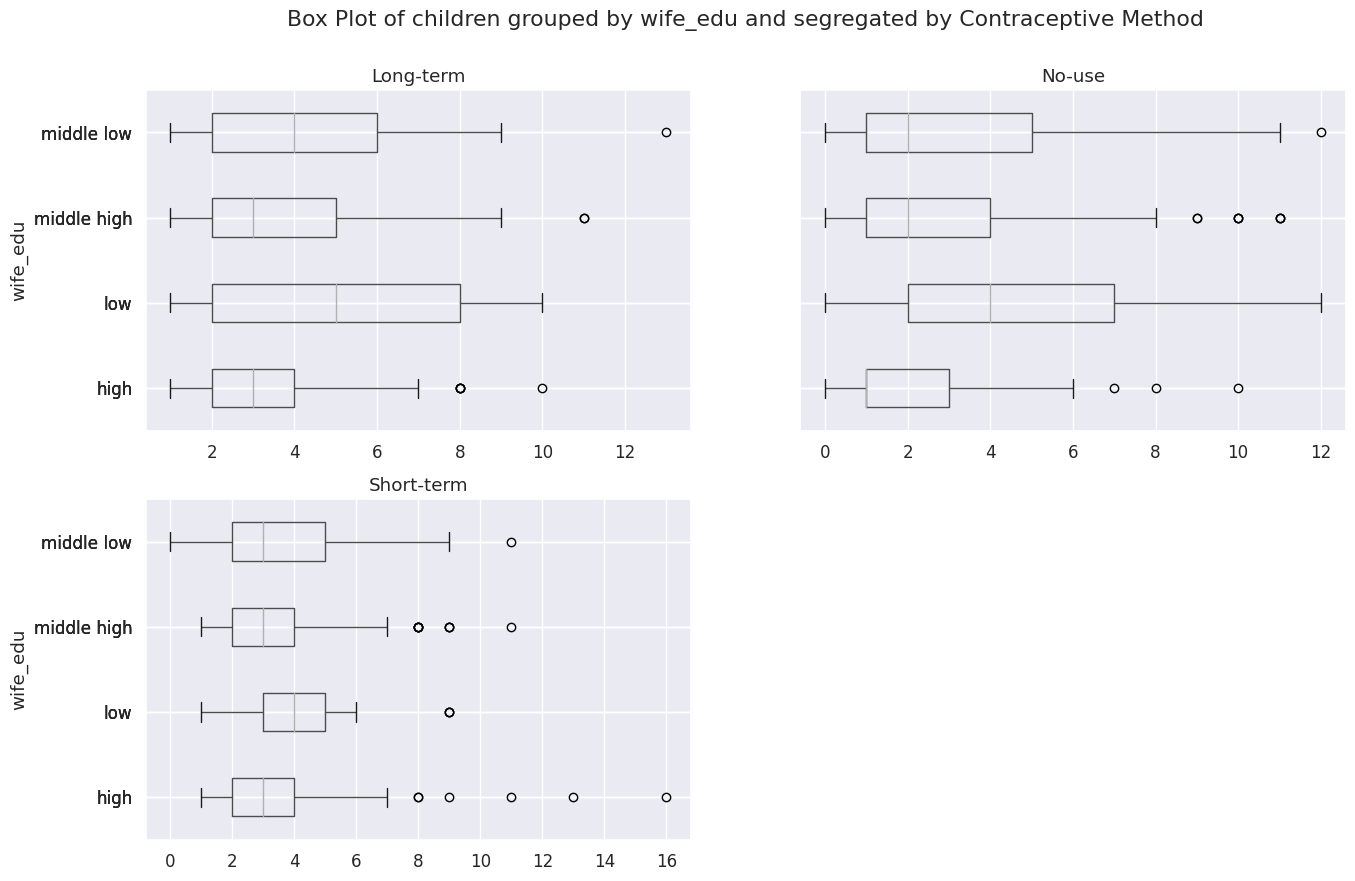

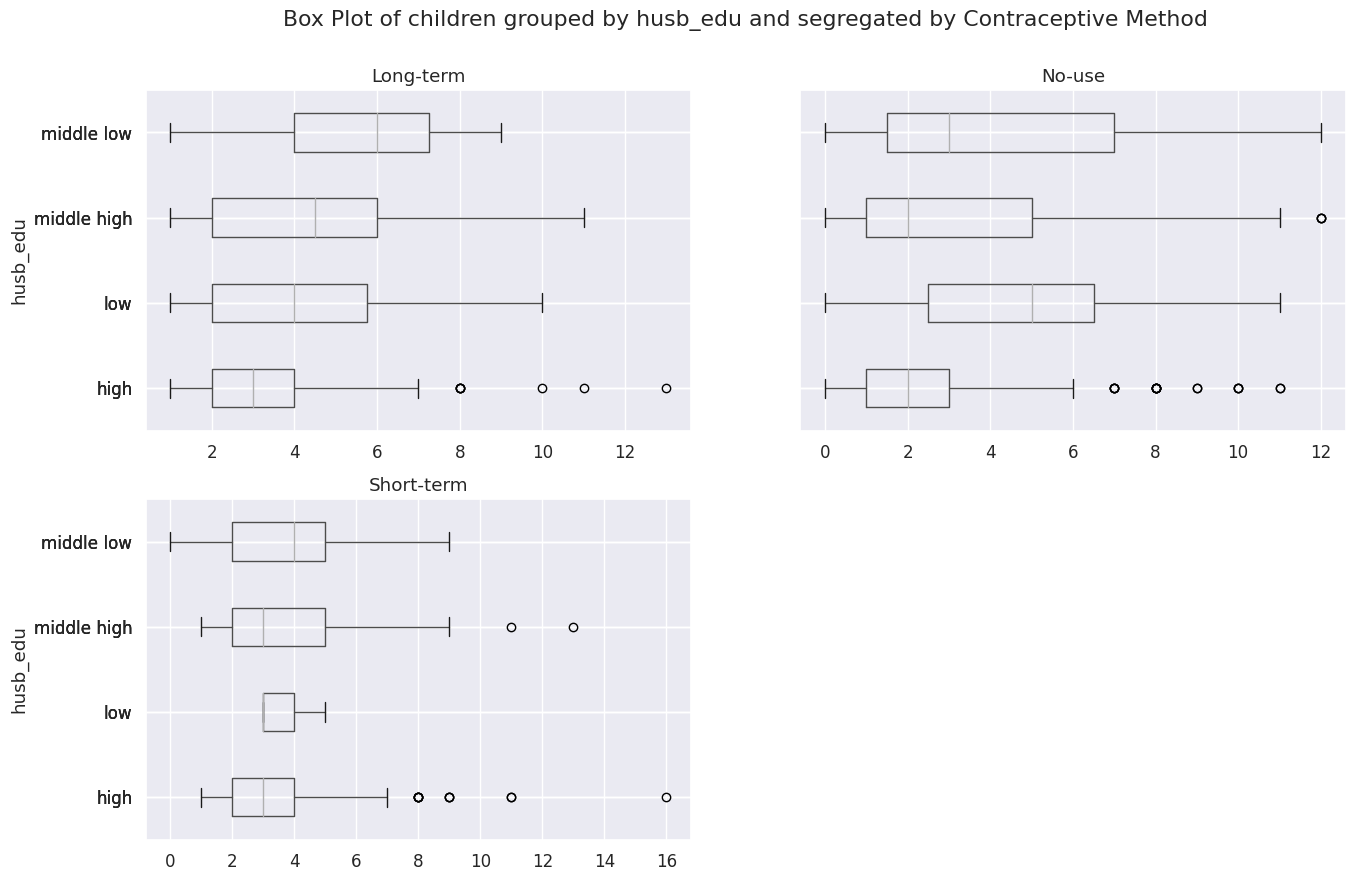

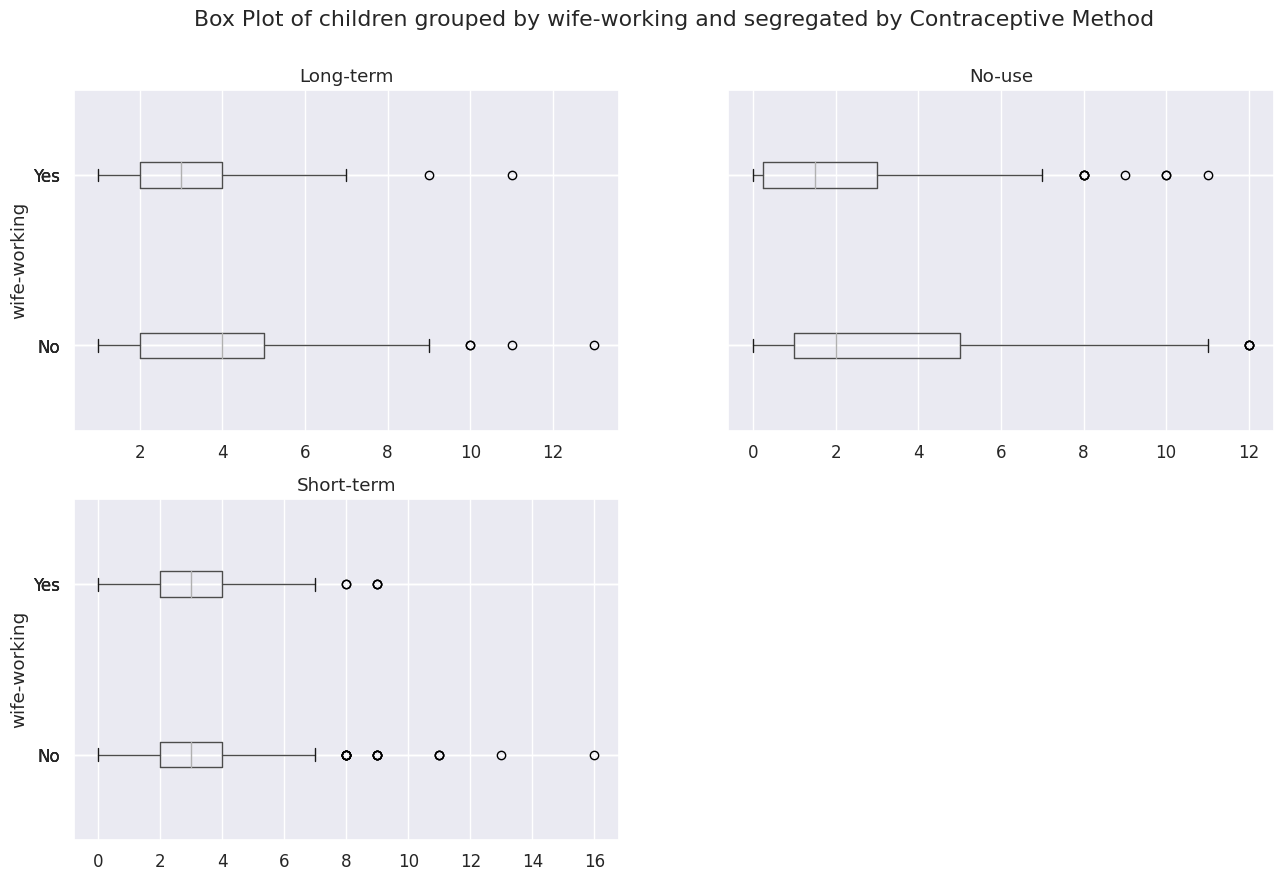

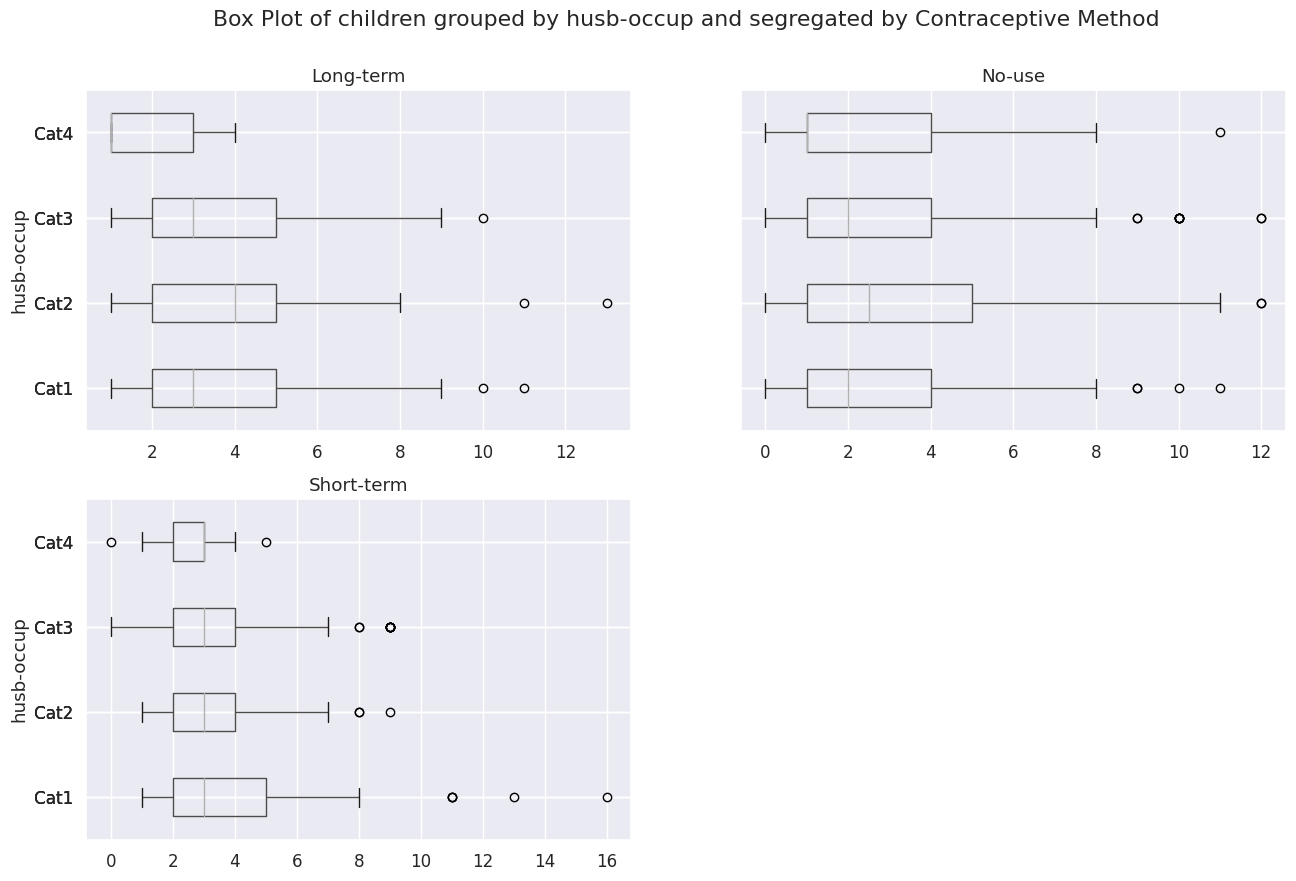

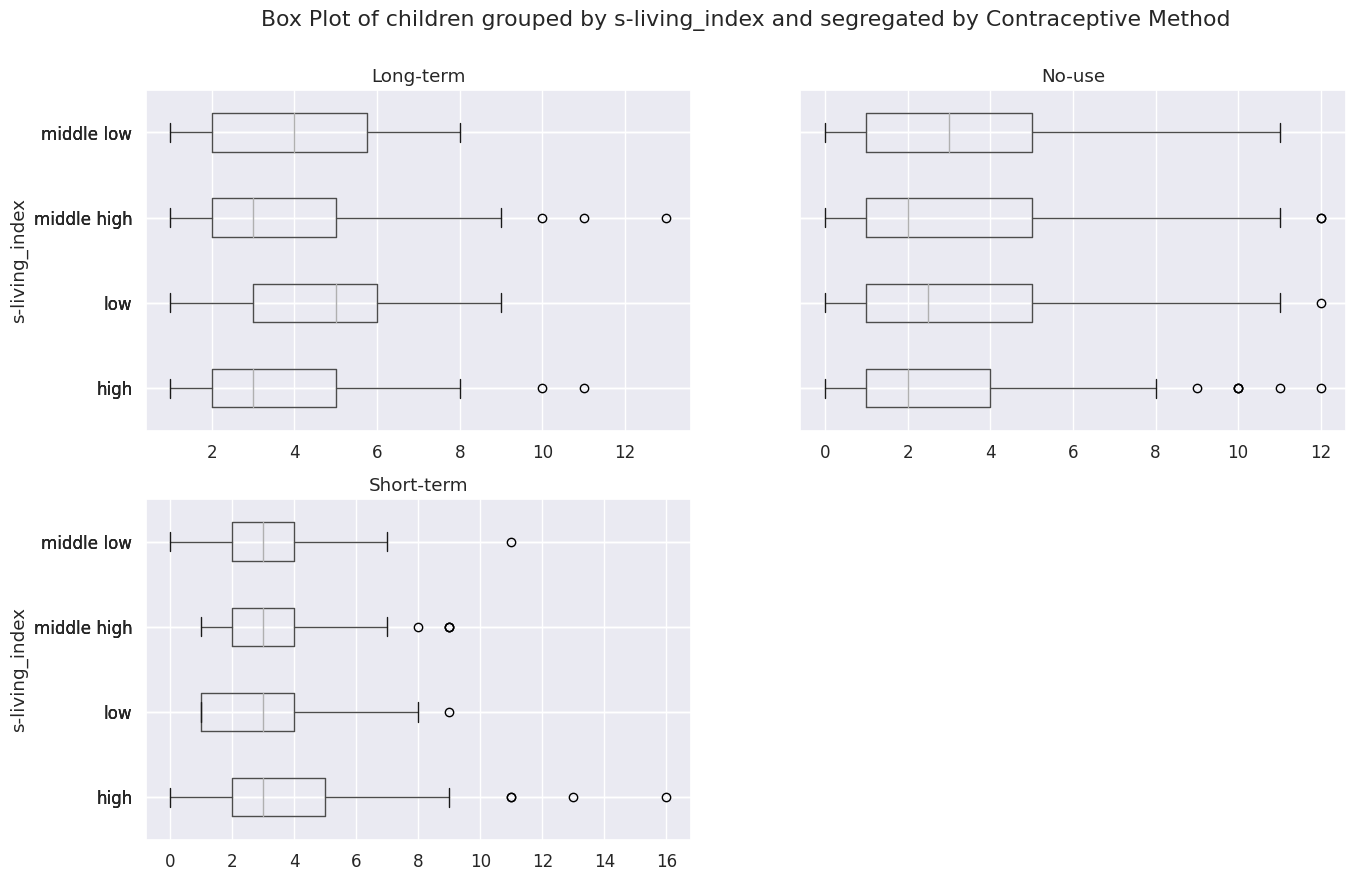

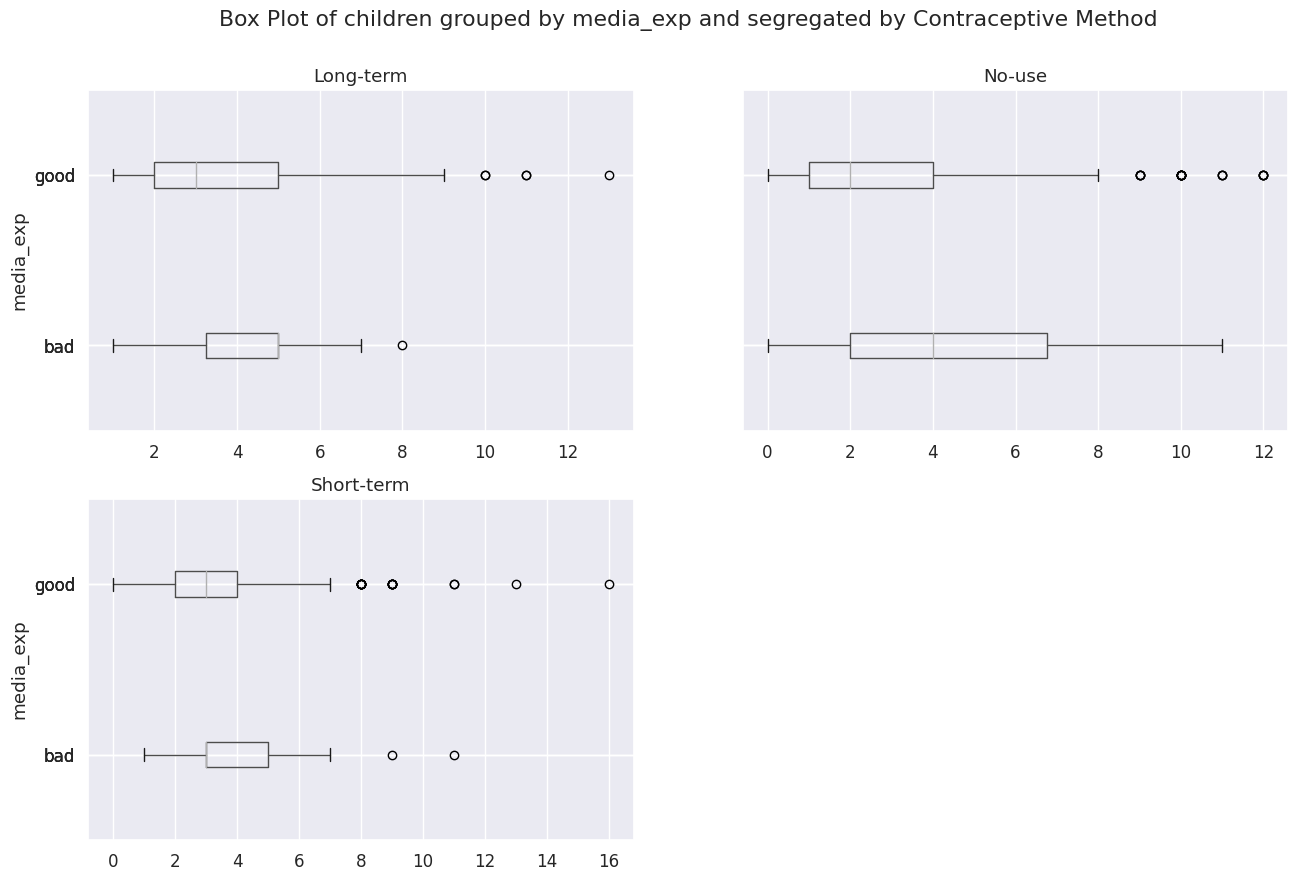

In [526]:
plt.rcParams["font.family"] = "DejaVu Sans"
sns.set(font_scale = 1.1)
for col in ['wife_age','children']:
    for k in ['wife_edu', 'husb_edu', 'wife-working','husb-occup','s-living_index','media_exp']:
        ax = data.groupby('contrac_mthd').boxplot(column = col, by = k, vert = False, figsize=(15,10))
        plt.suptitle("Box Plot of " + col + " grouped by " + k +
                     " and segregated by Contraceptive Method")
        plt.yticks()
        plt.show()

Reexamining the dataset

In [527]:
#Dataset dimension
data=pd.read_csv('cmc.data',names=[ 'wife_age', 'wife_edu', 'husb_edu', 'children', 'wife_religion', 'wife-working', 'husb-occup',
                                       's-living_index', 'media_exp', 'contrac_mthd'])
data.head()

,wife_age,wife_edu,husb_edu,children,wife_religion,wife-working,husb-occup,s-living_index,media_exp,contrac_mthd
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


###Missing Values
Most datasets will have some form of missing values. So, it is important to check for any missing.


In [528]:
data.isnull().sum()

wife_age          0
wife_edu          0
husb_edu          0
children          0
wife_religion     0
wife-working      0
husb-occup        0
s-living_index    0
media_exp         0
contrac_mthd      0
dtype: int64

Splitting data-set into the set of descriptive features and the target

In [529]:
contr_data = dataC.copy()
data = contr_data.drop(columns = 'contrac_mthd')
target = contr_data['contrac_mthd']
# store the input features

In [530]:
data.sample(5)

,wife_age,wife_edu,husb_edu,children,wife_religion,wife-working,husb-occup,s-living_index,media_exp
667,27,middle low,high,3,Islam,No,Cat4,high,good
1420,44,high,high,5,Islam,No,Cat3,high,good
1310,38,high,high,3,Other,Yes,Cat2,high,good
269,47,low,low,6,Islam,Yes,Cat3,low,good
378,18,middle low,middle high,1,Islam,No,Cat2,middle high,good


In [531]:
x = data
y = target

In [532]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Splitting Data into Training and Test Sets

The model has been  trained and tuned on 1031 rows of training data and tested on 442 rows of test data

In [533]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [534]:
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

In [535]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs',max_iter=3000)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [536]:
# predicted values
y_pred = lr_model.predict(X_test)
# actual values
actual = y_test

In [537]:
# create a dictionary and a data frame and check correct predictions
dic = {'Actual':actual,
'Prediction':y_pred,
'correct_prediction':0
}
result = pd.DataFrame(dic)

In [538]:
# update the correct_prediction values to 1, if correct prediction
def myfunc(x,y):
  if x == y:
    return 1
  else:
    return 0
result['correct_prediction'] = result.apply(lambda x: myfunc(x.Actual, x.Prediction), axis=1)

In [539]:
result[result.correct_prediction==0]

,Actual,Prediction,correct_prediction
446,Long-term,No-use,0
1442,Short-term,Long-term,0
420,Long-term,No-use,0
487,Long-term,No-use,0
674,Short-term,No-use,0
...,...,...,...
621,Long-term,No-use,0
56,No-use,Long-term,0
1428,Short-term,Long-term,0
798,Short-term,No-use,0


In [540]:
print(f'Model Accuracy on Test Data is {len(result[result.correct_prediction==1])/len(result)}')

Model Accuracy on Test Data is 0.511864406779661
